In [24]:
import yfinance as yf
import matplotlib.pyplot as plt

gold_ticker = "GC=F"
gold_data = yf.download(gold_ticker, start="2000-08-30")
gold_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [25]:
dollar_ticker = "DX=F"
sp500_ticker = "^GSPC"

dollar_data = yf.download(dollar_ticker, start="2000-08-30")
sp500_data = yf.download(sp500_ticker, start="2000-08-30")

import pandas_datareader as pdr
data_source = 'fred'
central_reserves = pdr.DataReader('WALCL', data_source, start='2000-08-30')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
dollar_data.head()

oil_ticker = "CL=F"
yuan_ticker = "CNHUSD=X"
oil_data = yf.download(oil_ticker, start="2000-08-30")
#yuan_data = yf.download(yuan_ticker, start="2000-08-30")
#yuan_data.head()

[*********************100%%**********************]  1 of 1 completed


In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [28]:
len_nan = len(gold_data)
df = pd.DataFrame({'Gold': gold_data['Close'], "S&P500": sp500_data['Close'], 'USD': dollar_data['Close'], "Oil": oil_data['Close'], "CentralReserves": central_reserves['WALCL']})

# =====
import pandas as pd

# there are missing dates; fill in the dates and then estimate the missing values
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(complete_date_range)

# There are missing values; use linear interpolation to fill in the missing values
df = df.interpolate()
print(df.head())

# =====

standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized,columns=df.columns)
df_standardized.tail()


                  Gold       S&P500         USD        Oil  CentralReserves
2000-08-30  273.899994  1502.589966  112.080002  33.400002              NaN
2000-08-31  278.299988  1517.680054  112.570000  33.099998              NaN
2000-09-01  277.000000  1520.770020  111.330002  33.380001              NaN
2000-09-02  276.699997  1517.347504  111.320002  33.485001              NaN
2000-09-03  276.399994  1513.924988  111.310003  33.590000              NaN


,Gold,S&P500,USD,Oil,CentralReserves
8587,1.874479,2.836134,1.074573,0.571700,1.539919
8588,1.903979,2.788580,1.072336,0.548481,1.538281
8589,1.935345,2.812321,1.033685,0.587047,1.536643
8590,1.949722,2.860148,0.984567,0.579177,1.536643
8591,1.980715,2.860148,0.983493,0.554778,1.536643


In [29]:
#df['NaN'] = df.isnull().any(axis=1)
MeanImputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(MeanImputer.fit_transform(df),columns=df.columns)

y=df_imputed['Gold']
X_names = ['S&P500', 'USD', 'Oil','CentralReserves']
X_names_no_central = ['S&P500', 'USD', 'Oil']
X = df_imputed[X_names]
X_no_central = df[X_names_no_central]

X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=1)
X_train_no_central, X_valid_no_central, y_train_no_central, y_valid_no_central = train_test_split(X_no_central, y, random_state=1)

rf_100 = RandomForestRegressor(random_state=1)
rf_500 = RandomForestRegressor(n_estimators=500, random_state=1)
rf_1000 = RandomForestRegressor(n_estimators=1000, random_state=1)

In [30]:
def get_scores_rf(X_train, X_test, y_train, y_test):
    randf_100 = RandomForestRegressor(random_state=1)
    randf_100.fit(X_train, y_train)
    preds_100 = randf_100.predict(X_test)
    print("MAE with 100 estimators:", mean_absolute_error(y_test, preds_100))
    print('MAPE with 100 estimators: ', mean_absolute_percentage_error(y_test,preds_100))
    

    randf_500 = RandomForestRegressor(random_state=1, n_estimators=500)
    randf_500.fit(X_train, y_train)
    preds_500 = randf_500.predict(X_test)
    print("\nMAE with 500 estimators: ", mean_absolute_error(y_test, preds_500))
    print('MAPE with 500 estimators: ', mean_absolute_percentage_error(y_test, preds_500))

    randf_1000 = RandomForestRegressor(random_state=1, n_estimators=1000)
    randf_1000.fit(X_train, y_train)
    preds_1000 = randf_1000.predict(X_test)
    print("\nMAE with 1000 estimators: ", mean_absolute_error(y_test, preds_1000))
    print('MAPE with 1000 estimators: ', mean_absolute_percentage_error(y_test, preds_1000))   

In [91]:
get_scores_rf(X_train, X_valid, y_train, y_valid)
print('\nNO CENTRAL RESERVE DATASET:\n')
get_scores_rf(X_train_no_central, X_valid_no_central, y_train_no_central, y_valid_no_central)


# very interesting to note that there is a slight improvement in MAPE when using the dataset without the central reserve levels

MAE with 100 estimators: 10.123478313501915
MAPE with 100 estimators:  0.009949120078892697

MAE with 500 estimators:  10.020042007724369
MAPE with 500 estimators:  0.009794377743159749

MAE with 1000 estimators:  10.011636769827806
MAPE with 1000 estimators:  0.009790434187340923

NO CENTRAL RESERVE DATASET:

MAE with 100 estimators: 20.332613335750636
MAPE with 100 estimators:  0.018711819909682775

MAE with 500 estimators:  20.375130380029425
MAPE with 500 estimators:  0.018689847959845223

MAE with 1000 estimators:  20.336727777469026
MAPE with 1000 estimators:  0.018656490331861744


In [92]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=100, n_estimators = 100)

xgb_model = xgb_regressor.fit(X_train_no_central, y_train_no_central)
y_preds_xgb = xgb_model.predict(X_valid_no_central)

xgb_model_2 = xgb_regressor.fit(X_train, y_train)
y_preds_xgb_2 = xgb_model_2.predict(X_valid)

print('MAPE xgb_model with no central reserve variable: ', mean_absolute_percentage_error(y_valid_no_central, y_preds_xgb))
print('MAPE xgb_model with central reserve variable: ', mean_absolute_percentage_error(y_valid, y_preds_xgb_2))

# interesting to note that the dataset with the central reserve variable performed better here

MAPE xgb_model with no central reserve variable:  0.01904897617666798
MAPE xgb_model with central reserve variable:  0.010251364129544232


In [93]:
# It is apparent that the price of gold is very closely related to the level of the S&P500 (used broadly as a measure of how well the American economy is doing), 
# the level of the US dollar and the price of oil.
# Now, I will be using time series analysis to see if I can model the price of gold using past levels

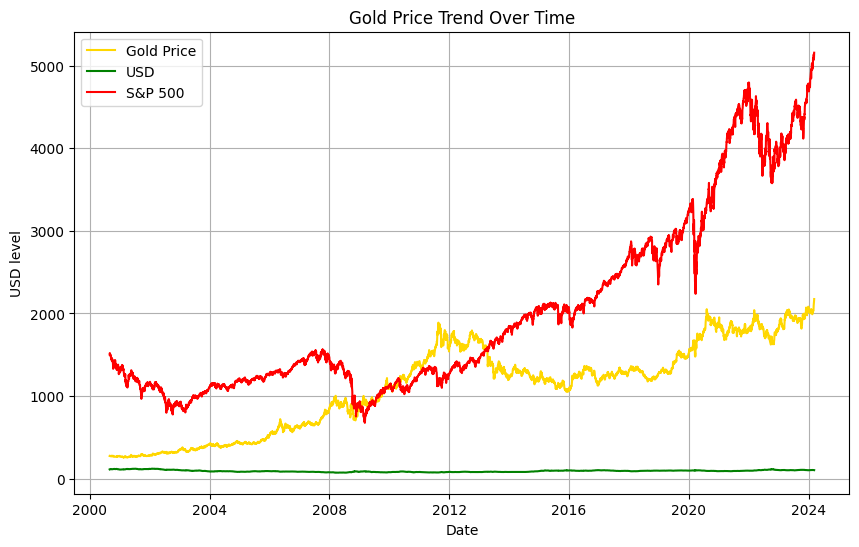

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 1000x600 with 0 Axes>

In [31]:
plt.figure(figsize=(10,6))
plt.plot(df['Gold'], label = 'Gold Price', color='gold')
plt.plot(df['USD'], label='USD',color='green')
plt.plot(df['S&P500'], label='S&P 500', color='red')
plt.title('Gold Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('USD level')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10,6))
plt.plot

In [32]:
# Gold preice seems non-stationary, meaning the mean changes over time.
# Take first differences of the gold price time series to see what can be deduced
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.stats.aic import aic
#plt.plot(df['Gold'].diff(), label = 'Differenced Gold Price', color='gold')
#plot_acf(df['Gold'].diff())
#plot_pacf(df['Gold'].diff())
#pyplot.show()

# no meaningful information derived from this process; now we try taking the log of the series

#plt.plot(np.log(df['Gold']), label='Log of Gold Price', color='gold')
#plot_acf(np.log(df['Gold']), lags=100)
#plot_pacf(np.log(df['Gold']), lags=100)


#plt.plot(df['Gold'], label = 'Differenced Gold Price', color='gold')
#plot_acf(df['Gold'], lags=5)
#plot_pacf(df['Gold'], lags=5)
#pyplot.show()
# seems as if AR(1) process could be useful;

model_1 = ARIMA(df['Gold'], order=(1,0,0))
ar1_fit = model_1.fit()

print(ar1_fit.aic)
            

64091.461060505506


In [1]:
#!pip install pmdarima
from pmdarima import auto_arima

automated_model = auto_arima(df['Gold'], stepwise=True)
print(automated_model)
automated_fitted_model = automated_model.fit(df['Gold'])
print(automated_fitted_model.aic)

# Very interesting that automated model selection suggested an ARIMA(0,1,2)
# Let's examine the graph

twice_diffed = df['Gold'].diff().diff()
plt.plot(twice_diffed, label = 'Differenced Gold Price', color='gold')
plot_acf(twice_diffed, lags=5)
plot_pacf(twice_diffed, lags=5)
pyplot.show()

# graph looks weird; need to do more research

: 